In [47]:
import csv
import time
import datetime
import pandas as pd 
from pandas.io.json import json_normalize
import json  
import threading
from datetime import datetime
import numpy as np
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [39]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)
df = pd.read_json('master_list_proof_26121737')
df.tail(3)



,id,counter,name,text,created_at,time_interval,retweets,likes,followers,hashtags,user_mentions,update 1,likes 1,retweets 1,update 2,likes 2,retweets 2,update 3,likes 3,retweets 3,update 4,likes 4,retweets 4,update 5,likes 5,retweets 5,update 6,likes 6,retweets 6,update 7,likes 7,retweets 7,update 8,likes 8,retweets 8,update 9,likes 9,retweets 9,update 10,likes 10,retweets 10,update 11,likes 11,retweets 11,update 12,likes 12,retweets 12,update 13,likes 13,retweets 13,update 14,likes 14,retweets 14,update 15,likes 15,retweets 15,update 16,likes 16,retweets 16,update 17,likes 17,retweets 17,update 18,likes 18,retweets 18,update 19,likes 19,retweets 19,update 20,likes 20,retweets 20,update 21,likes 21,retweets 21,update 22,likes 22,retweets 22,update 23,likes 23,retweets 23,update 24,likes 24,retweets 24,update 25,likes 25,retweets 25,update 26,likes 26,retweets 26,update 27,likes 27,retweets 27,update 28,likes 28,retweets 28,update 29,likes 29,retweets 29,update 30,likes 30,retweets 30
865,1210600560719781889,5,realDonaldTrump,Thank YOU Indian Country for being such an IMP...,2019-12-27 16:37:20,1577464873,977,3519,67977315,[],[],1.577465e+09,4329.0,1215.0,1.577465e+09,4882.0,1364.0,1.577465e+09,5479.0,1525.0,1.577465e+09,6085.0,1685.0,1.577465e+09,6595.0,1805.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
866,1210602804869513224,1,Reuters,"South Korea’s top court dismisses ""comfort wom...",2019-12-27 16:46:15,1577465195,2,0,20972499,[],[],1.577465e+09,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
867,1210603082767355904,0,washingtonpost,One of the nation’s biggest school systems wil...,2019-12-27 16:47:21,1577465263,1,3,14567540,[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#die Spalten habe ich leider mit Leerzwichen benannt, sau dumm..... 
#daher behebe ich den Fehler hier wieder
df = df.rename({'retweets 30': 'retweets_last','retweets 19': 'retweets_19','retweets 20': 'retweets_20'}, axis='columns')

In [41]:
#Ich neheme nur die Tweets die 30x aktualisiert wurden 
#und alle die beim ersten crawlen weniger als 50 retweets_counts haben. Damit versuchen wir die RT's auszusortieren
#kann man wahrscheinlich eleganter mit dem TimeStamp lösen indem wir die Zeit zwischen created_at und retweets_1
#auf 120 sek. limitieren
df = df[df.counter == 30]
df = df[df.retweets < 50]
df = df[df.name != 'realDonaldTrump']
df= df.tail(500)

In [42]:
#Schauen wie viele Tweets zu weiteren Analyse verfügbar sind. 
#dff = df.groupby('counter')['id']
dff = df.groupby('counter')['id']
dff.nunique()

counter
30    500
Name: id, dtype: int64

                            OLS Regression Results                            
Dep. Variable:              followers   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                 -0.088
Method:                 Least Squares   F-statistic:                    0.3557
Date:                Mon, 30 Dec 2019   Prob (F-statistic):              0.570
Time:                        09:49:12   Log-Likelihood:                -163.42
No. Observations:                   9   AIC:                             330.8
Df Residuals:                       7   BIC:                             331.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.712e+07   1.08e+07      1.592

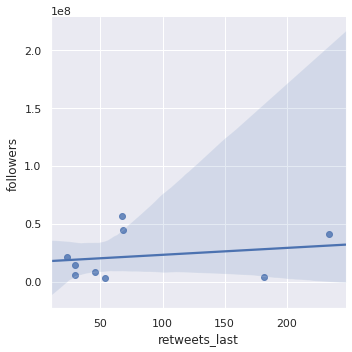

In [58]:
import matplotlib.pyplot as plt

%matplotlib inline

#Durchschnittliche retweet höher ermitteln 
df_re = df.groupby('name')['retweets_last'].mean()
df_re = df_re.to_frame()
#Feststellen wie viel Follower ein Twitternutzer maximal hat
df_fol = df.groupby('name')['followers'].max()
df_fol = df_fol.to_frame()


#Follower / avg. Retweets = engagement rate 
df_engagement = pd.Series((df_re['retweets_last']/df_fol['followers'])* 100, name="engagement_10000")
df_engagement = df_engagement.round(decimals=6)
df_engagement = df_engagement.to_frame()

#Die verschiedenen DF mergen, erstellen eines DF mit followern, retweets (mean im letzten Intervall) und sich der 
#darau ergebene engagement rate 
df_res = pd.concat([df_fol, df_re, df_engagement], axis=1, sort=False)

#Regression analysis
results = sm.OLS(y,sm.add_constant(x)).fit()
print(results.summary())

# if there is a neg. correlation between engagement rate and Follower_count
g = sns.lmplot(x="retweets_last", y="followers", data=df_res)


In [59]:
dff = df.groupby('counter')['id']
dff.nunique()

counter
30    500
Name: id, dtype: int64

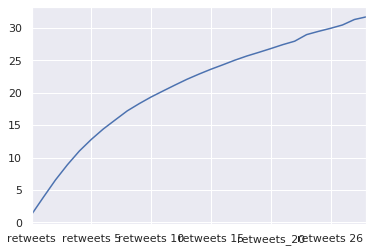

In [60]:
%matplotlib inline
from scipy import stats
import numpy as np
# Outliers rausschmeißen und den durchschnittlichen Totalen Zuwachs plotten
#df = df[['retweets','retweets 1', 'retweets 2', 'retweets 3','retweets 4','retweets 5','retweets 6','retweets 7','retweets 8','retweets 9','retweets 10','retweets 11','retweets 12','retweets 13','retweets 14','retweets 15','retweets 16','retweets 17','retweets 18','retweets_19','retweets_20','retweets 21','retweets 22','retweets 24','retweets 25','retweets 26','retweets 27','retweets 29','retweets_last','retweets 31','retweets 32','retweets 33','retweets 34','retweets 35','retweets 36','retweets 37','retweets 38','retweets 39','retweets 40','retweets 41','retweets 42','retweets 43','retweets 44','retweets 45','retweets 46','retweets 47','retweets 48','retweets 49','retweets 50','retweets 51','retweets 52','retweets 53','retweets 54','retweets 55','retweets 56','retweets 57','retweets 58','retweets 59','retweets 60']].copy()
df = df[['retweets','retweets 1', 'retweets 2', 'retweets 3','retweets 4','retweets 5','retweets 6','retweets 7','retweets 8','retweets 9','retweets 10','retweets 11','retweets 12','retweets 13','retweets 14','retweets 15','retweets 16','retweets 17','retweets 18','retweets_19','retweets_20','retweets 21','retweets 22','retweets 24','retweets 25','retweets 26','retweets 27','retweets 29','retweets_last']].copy()
df_retweets = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)].tail(500).mean()
df_retweets.plot()

In [61]:
#Dataframe erstellen der nur noch die Retweetwerte beinhaltet
df_r = df[['retweets','retweets 1', 'retweets 2', 'retweets 3','retweets 4','retweets 5','retweets 6','retweets 7','retweets 8','retweets 9','retweets 10','retweets 11','retweets 12','retweets 13','retweets 14','retweets 15','retweets 16','retweets 17','retweets 18','retweets_19','retweets_20','retweets 21','retweets 22','retweets 24','retweets 25','retweets 26','retweets 27','retweets 29','retweets_last']].copy()
#df_r = df[['retweets','retweets 1', 'retweets 2', 'retweets 3','retweets 4','retweets 5','retweets 6','retweets 7','retweets 8','retweets 9','retweets 10','retweets 11','retweets 12','retweets 13','retweets 14','retweets 15','retweets 16','retweets 17','retweets 18','retweets_19','retweets_20','retweets 21','retweets 22','retweets 24','retweets 25','retweets 26','retweets 27','retweets 29','retweets_last','retweets 31','retweets 32','retweets 33','retweets 34','retweets 35','retweets 36','retweets 37','retweets 38','retweets 39','retweets 40','retweets 41','retweets 42','retweets 43','retweets 44','retweets 45','retweets 46','retweets 47','retweets 48','retweets 49','retweets 50','retweets 51','retweets 52','retweets 53','retweets 54','retweets 55','retweets 56','retweets 57','retweets 58','retweets 59','retweets 60']].copy()

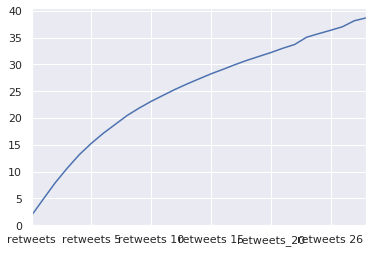

In [62]:
#Geht auch ohne die Outliers zu entfernen da wir nur mit Durchschnittswerten rechenen
%matplotlib inline

from scipy import stats
import numpy as np
df_r.tail(500).mean().plot()

Anmerkung: Reduktion wird wsh durch Löschung von Tweets ausgelöst 
Vincent: hast du dafür noch weitere Anhaltspunkte gefunden? 
            Habe einen gefunden der die Größe hätte und bei retweet 19 gelöscht wurde ist Nr. 345 von D. Trump



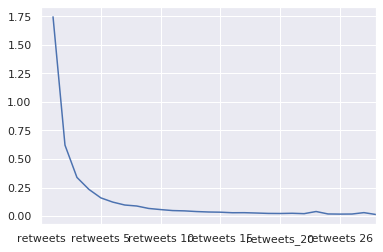

In [63]:
#%-Wachstumsraten Plotten 

df_r.tail(500).mean().pct_change().plot()




In [88]:
df_r.tail(300).mean()

retweets          1.976667
retweets 1        5.086667
retweets 2        8.060000
retweets 3       10.720000
retweets 4       13.253333
retweets 5       15.456667
retweets 6       17.323333
retweets 7       18.953333
retweets 8       20.620000
retweets 9       22.076667
retweets 10      23.380000
retweets 11      24.510000
retweets 12      25.603333
retweets 13      26.696667
retweets 14      27.670000
retweets 15      28.696667
retweets 16      29.543333
retweets 17      30.530000
retweets 18      31.463333
retweets_19      32.256667
retweets_20      33.086667
retweets 21      34.020000
retweets 22      34.786667
retweets 24      36.293333
retweets 25      36.980000
retweets 26      37.683333
retweets 27      38.370000
retweets 29      39.653333
retweets_last    40.273333
dtype: float64